# Exploring and Visualizing Weather Data

This tutorial will guide you through the process of loading, exploring, and visualizing weather data using Python libraries `pandas`, `seaborn`, and `plotly`. 

To install the required libraries for this tutorial, run the following command in your Conda terminal:

```bash
conda install pandas seaborn plotly jupyterlab -c conda-forge


In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import plotly.express as px

## Loading Data

The data contains daily recordings of average temperature, vapor pressure, wind speed, and net radiation from a weather station.


In [15]:
# Load the data from a CSV file
data_path = r"Data\HW3_ET_data.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

,Station,Date,Avg Temp (deg C),Vapor Pressure (Pa),Wind Speed (m/s),Net Radiation (Wm-2)
360,ftc01,12/27/2023,2.86,263,3.386574,81.63
361,ftc01,12/28/2023,-1.82,253,0.414931,106.71
362,ftc01,12/29/2023,2.08,234,0.960648,107.18
363,ftc01,12/30/2023,2.22,278,0.566319,106.02
364,ftc01,12/31/2023,-2.19,345,0.263657,73.80


In [ ]:
#Display the last few rows of the dataframe
df.tail()

## Exploring the DataFrame


In [20]:
# Basic info about the dataset
df.info()

# Statistical summary of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Station               365 non-null    object 
 1   Date                  365 non-null    object 
 2   Avg Temp (deg C)      365 non-null    float64
 3   Vapor Pressure (Pa)   365 non-null    int64  
 4   Wind Speed (m/s)      365 non-null    float64
 5   Net Radiation (Wm-2)  365 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 17.2+ KB


,Avg Temp (deg C),Vapor Pressure (Pa),Wind Speed (m/s),Net Radiation (Wm-2)
count,365.000000,365.000000,365.000000,365.000000
mean,9.079096,724.498630,1.292361,177.595205
std,9.572409,440.668253,1.083164,80.986650
min,-20.520000,93.000000,0.160185,9.510000
25%,1.090000,347.000000,0.694329,109.030000
50%,10.120000,539.000000,0.967593,176.270000
75%,16.930000,1139.000000,1.412037,245.600000
max,26.220000,1829.000000,9.722222,358.800000


In [22]:
# Check for missing values
df.isnull().sum()

Station                 0
Date                    0
Avg Temp (deg C)        0
Vapor Pressure (Pa)     0
Wind Speed (m/s)        0
Net Radiation (Wm-2)    0
dtype: int64

In [21]:
# Displaying middle rows of the DataFrame
middle_index = len(df) // 2
df_middle = df[middle_index - 5:middle_index + 5]
df_middle

,Station,Date,Avg Temp (deg C),Vapor Pressure (Pa),Wind Speed (m/s),Net Radiation (Wm-2)
177,ftc01,6/27/2023,22.89,1118,2.324074,350.12
178,ftc01,6/28/2023,21.02,1479,0.976852,320.83
179,ftc01,6/29/2023,19.91,1414,1.692130,312.85
180,ftc01,6/30/2023,14.52,1325,0.623727,140.86
181,ftc01,7/1/2023,18.80,1192,1.098380,290.05
182,ftc01,7/2/2023,21.76,1219,0.731944,293.75
183,ftc01,7/3/2023,21.07,1127,0.704977,265.39
184,ftc01,7/4/2023,18.23,1326,1.030093,197.11
185,ftc01,7/5/2023,12.95,1418,0.488542,58.68
186,ftc01,7/6/2023,16.17,1549,0.653009,146.30


In [ ]:
#show only temperature and wind speed columns
df[['Avg Temp (deg C)', 'Wind Speed (m/s)']]

## Filtering the DataFrame to show only days where the wind speed was above average.


In [9]:
# Filtering DataFrame for days with above-average wind speeds
average_wind_speed = df['Wind Speed (m/s)'].mean()
df_high_wind = df[df['Wind Speed (m/s)'] > average_wind_speed]
df_high_wind
#highlight the days in df_high_wind with above-average Avg Temp (deg C)


,Station,Date,Avg Temp (deg C),Vapor Pressure (Pa),Wind Speed (m/s),Net Radiation (Wm-2)
9,ftc01,1/10/2023,3.84,433,1.332176,109.72
17,ftc01,1/18/2023,-2.90,392,2.652778,51.78
20,ftc01,1/21/2023,-3.22,301,1.612269,79.91
24,ftc01,1/25/2023,-2.41,231,5.622685,120.60
25,ftc01,1/26/2023,-1.02,231,2.409722,115.28
...,...,...,...,...,...,...
356,ftc01,12/23/2023,4.99,514,1.297454,53.33
357,ftc01,12/24/2023,-2.83,295,3.415509,94.79
358,ftc01,12/25/2023,-4.82,178,2.940972,92.71
359,ftc01,12/26/2023,2.05,271,9.722222,50.39


## Fancy DataFrame Display


In [32]:
# Calculate the average wind speed
average_wind_speed = df['Wind Speed (m/s)'].mean()

# Filter DataFrame for days with above-average wind speeds
df_high_wind = df[df['Wind Speed (m/s)'] > average_wind_speed]

# Calculate the average temperature of the high wind speed days
average_temp_high_wind = df_high_wind['Avg Temp (deg C)'].mean()

df_high_wind_subset = df_high_wind[20:30]

# Highlight the days with above-average temperature in the high wind dataset
def highlight_above_average_temp(row, avg_temp):
    return ['background-color: red' if val > avg_temp else '' for val in row]

# Applying the highlight function to the temperature column
styled_df = df_high_wind_subset.style.apply(highlight_above_average_temp, avg_temp=average_temp_high_wind, subset=['Avg Temp (deg C)'])
styled_df


,Station,Date,Avg Temp (deg C),Vapor Pressure (Pa),Wind Speed (m/s),Net Radiation (Wm-2),Wind Speed Category
64,ftc01,3/6/2023,-0.840000,359,1.827546,204.510000,High
66,ftc01,3/8/2023,-1.360000,453,1.653935,42.820000,High
67,ftc01,3/9/2023,2.360000,373,2.304398,223.150000,High
69,ftc01,3/11/2023,6.140000,299,4.474537,218.980000,High
70,ftc01,3/12/2023,-0.500000,344,1.832176,186.920000,High
73,ftc01,3/15/2023,9.600000,488,1.768519,200.690000,High
74,ftc01,3/16/2023,0.280000,256,5.284722,227.660000,High
75,ftc01,3/17/2023,-1.590000,172,2.086806,245.600000,High
76,ftc01,3/18/2023,-1.780000,160,1.674769,251.390000,High
78,ftc01,3/20/2023,4.020000,383,1.688657,150.000000,High


In [25]:
# Styling DataFrame for better readability
def style_specific_columns(df):
    return df.style.format({
        'Avg Temp (deg C)': "{:.2f}°C",
        'Vapor Pressure (Pa)': "{:.1f} Pa",
        'Wind Speed (m/s)': "{:.2f} m/s",
        'Net Radiation (Wm-2)': "{:.2f} W/m²"
    }).background_gradient(subset=['Avg Temp (deg C)'], cmap='coolwarm')

df_styled_high_wind = style_specific_columns(df_high_wind.head())
df_styled_high_wind


,Station,Date,Avg Temp (deg C),Vapor Pressure (Pa),Wind Speed (m/s),Net Radiation (Wm-2)
9,ftc01,1/10/2023,3.84°C,433.0 Pa,1.33 m/s,109.72 W/m²
17,ftc01,1/18/2023,-2.90°C,392.0 Pa,2.65 m/s,51.78 W/m²
20,ftc01,1/21/2023,-3.22°C,301.0 Pa,1.61 m/s,79.91 W/m²
24,ftc01,1/25/2023,-2.41°C,231.0 Pa,5.62 m/s,120.60 W/m²
25,ftc01,1/26/2023,-1.02°C,231.0 Pa,2.41 m/s,115.28 W/m²


## Seaborn: Fancy Scatter Plot


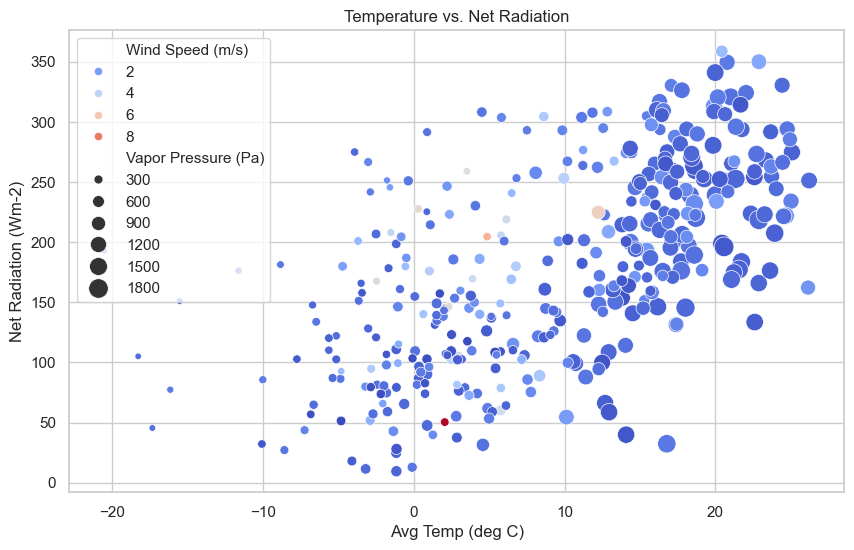

In [4]:
# Scatter plot of average temperature vs. net radiation
sns.set_theme(style="whitegrid")
scatter = sns.scatterplot(data=df, x='Avg Temp (deg C)', y='Net Radiation (Wm-2)', hue='Wind Speed (m/s)', palette='coolwarm', size='Vapor Pressure (Pa)', sizes=(20, 200))
scatter.set_title('Temperature vs. Net Radiation')
scatter.figure.set_size_inches(10, 6)


## Visualizing Correlations Between Weather Variables with a Heatmap



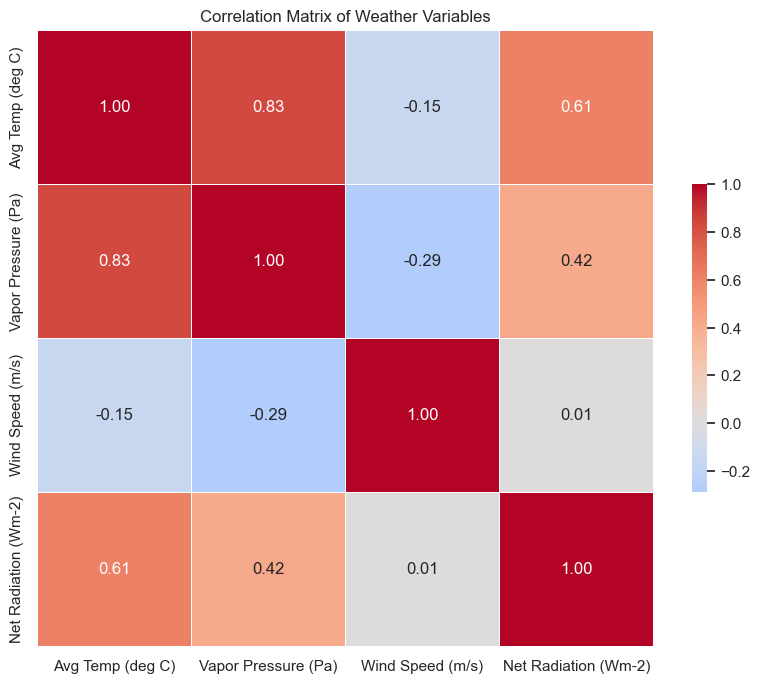

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df[['Avg Temp (deg C)', 'Vapor Pressure (Pa)', 'Wind Speed (m/s)', 'Net Radiation (Wm-2)']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
                      square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding title
plt.title('Correlation Matrix of Weather Variables')

# Show the plot
plt.show()


## Interactive Data Visualization with Plotly: Compare four Variables at once

In [5]:
# Interactive scatter plot with Plotly Express
fig = px.scatter(df, x='Avg Temp (deg C)', y='Net Radiation (Wm-2)',
                 color='Vapor Pressure (Pa)',
                 size='Wind Speed (m/s)',
                 hover_data=['Date'],
                 title='Interactive Plot of Temperature vs. Net Radiation')
fig.show()


## Aggregate and Plot Data by Month in Pandas with Groupby

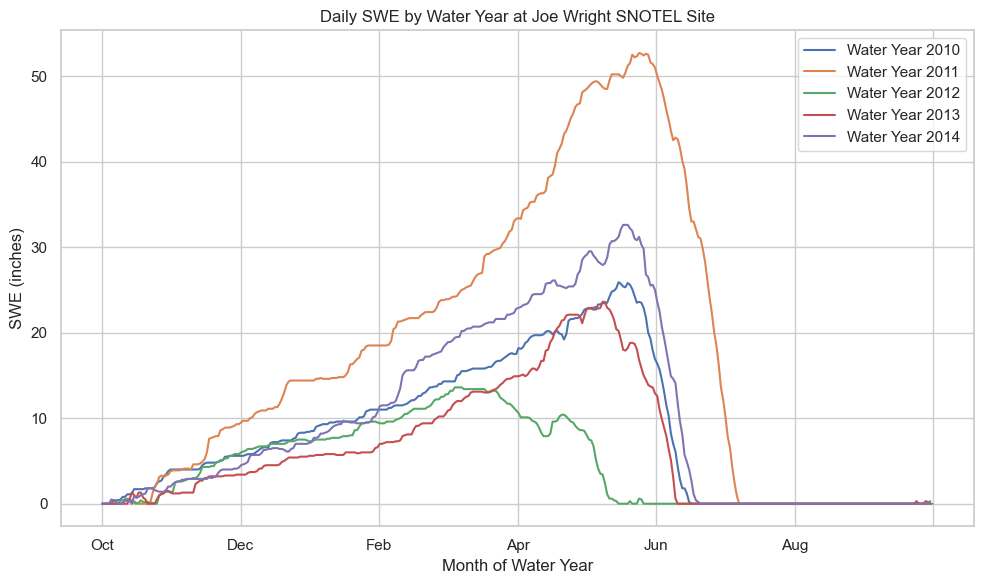

In [6]:

SWE_fn = SWE_fn = r"Data\Problem1_5yr_SWE.csv"
SWE_data = pd.read_csv(SWE_fn)

SWE_data['Date'] = pd.to_datetime(SWE_data['Date'], format='%m/%d/%Y') # Convert 'Date' column to datetime format

# Define a function to determine the water year
def get_water_year(date):
    if date.month >= 10:
        return date.year + 1
    else:
        return date.year

SWE_data['Water Year'] = SWE_data['Date'].apply(get_water_year) # Create a new column for 'Water Year'

fig, ax = plt.subplots(figsize=(10, 6))

# Group data by 'Water Year'
for year, group in SWE_data.groupby('Water Year'):
    # Create a reference date for the start of each water year
    start_of_water_year = pd.to_datetime(str(year-1) + '-10-01')
    
    # Calculate 'Day of Water Year' for each row in the group
    group = group.copy()  # To avoid SettingWithCopyWarning
    group['Day of Water Year'] = (group['Date'] - start_of_water_year).dt.days
    group['Month of Water Year'] = (group['Date'] - start_of_water_year).dt.days / 30.44
    # Plotting each group with a label for the water year
    ax.plot(group['Month of Water Year'], group['SWE (in)'], label=f'Water Year {year}')
    #Change to month of year
ax.set_xticks(np.arange(0, 12))  # Adjusted to align with the 'Month of Water Year' calculation
ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])

# This sets the major ticks on the x-axis to be spaced every 30 days (approximately monthly)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.title('Daily SWE by Water Year at Joe Wright SNOTEL Site')
plt.xlabel('Month of Water Year')
plt.ylabel('SWE (inches)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()